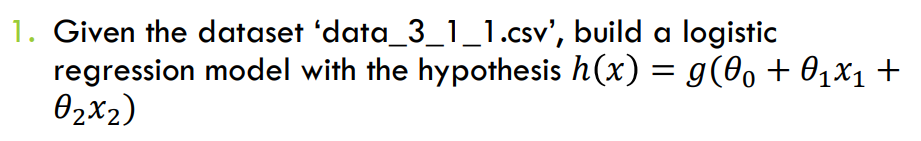

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('data_3_1_1.csv')
data

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1
...,...,...,...
95,5.37,4.89,1
96,2.74,6.76,0
97,8.35,5.27,1
98,7.17,4.34,1


In [3]:
data[:5]

,x1,x2,class
0,6.70,6.79,1
1,6.92,3.87,1
2,7.87,5.36,1
3,2.93,6.91,0
4,6.67,4.92,1


In [4]:
# [:] means all rows,
#[:, -1] means last element in all rows
#[:, :-1] means all rows with all elements in rows excepts last one( gives all except last colum)
# axis =0 means row-wise operation
# axis =1 means column-wise operation
data = data.to_numpy()
X = data[:,:-1] 
y= data[:,-1] 
print(X.shape)
print(y.shape)
X.mean(axis=0)

(100, 2)
(100,)


array([4.8598, 6.0577])

<b>`Feature scalling`

In [5]:
def scale(X):
    return (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [6]:
X_scaled = scale(X)
X_scaled[:5]

array([[ 0.22011962,  0.10184979],
       [ 0.24643541, -0.30426982],
       [ 0.36007177, -0.09703755],
       [-0.23083732,  0.11853964],
       [ 0.2165311 , -0.15823366]])

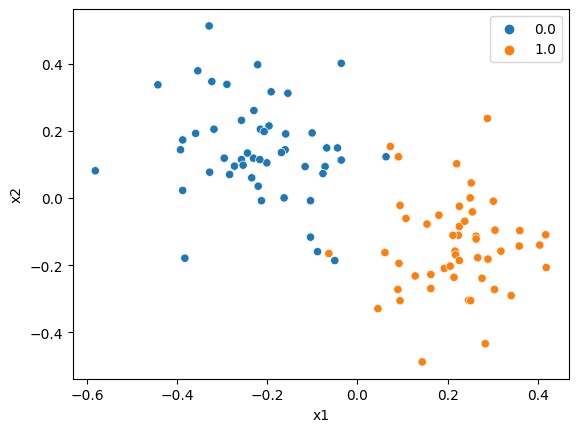

In [7]:
sns.scatterplot(x= X_scaled[:,0], y= X_scaled[:,1], hue =y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
x0 = np.ones((len(X),1))
X_new = np.concatenate((x0, X_scaled), axis=1)
X_new.shape

(100, 3)

In [9]:
def hyp(x, theta):
    z= np.matmul(x, theta)
    h= 1/(1+np.exp(-z))
    return h

theta = np.zeros((3,1))
print(hyp(X_new, theta))

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


`Define cost function ask 3 argumens involving : x , theta , y`

In [10]:
def cost(x, theta, y):
    c = -y.reshape((-1,1))*np.log(hyp(x,theta))-(1-y.reshape((-1,1)))*np.log(1-hyp(x,theta))
    c= c.mean()
    return c
print (cost(X_new, theta, y))

0.6931471805599453


`Define gradient descending methos `

In [11]:
def grad(x, theta, y):
    g = (hyp(x,theta) - y.reshape((-1,1))) * x
    g = 2 * (g.mean(axis = 0))
    return g.reshape((-1,1))

print(grad(X_new, theta, y))

[[ 0.        ]
 [-0.21901914]
 [ 0.14404729]]


`Training data`

In [22]:
theta = np.zeros((3,1))
alpha = 10

for i in range (100):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*grad(X_new, theta, y)
    print(cost_value)

0.6931471805599453
0.4198051359137389
0.31319522617096845
0.257876984750648
0.22368665849002112
0.20034677600890416
0.1833797084807854
0.17045407766429643
0.16006297285477217
0.1513164370218538
0.14367652192075117
0.1370413248911402
0.13130703335766114
0.12640214616668305
0.12216260690857997
0.11844316457569411
0.11512764633467208
0.11213816617097493
0.10942103906746169
0.10693677668930275
0.10465428206320194
0.10254813771336779
0.10059718334648463
0.09878361460799284
0.09709232889017089
0.09551042392050457
0.09402680546373475
0.09263187678512523
0.09131729051375677
0.09007574867228556
0.08890084024906679
0.08778690829518838
0.08672894043492066
0.08572247808779421
0.08476354075362588
0.08384856250605768
0.0829743384445158
0.08213797931819439
0.0813368728942479
0.08056865092172476
0.07983116076192126
0.07912244092889004
0.0784406999213512
0.07778429783717627
0.07715173034997416
0.07654161469871851
0.0759526773993612
0.07538374343472153
0.07483372671776753
0.07430162165538333
0.073786495

In [24]:
for i in range (100):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*grad(X_new, theta, y)
    print(theta,'\n')

[[-0.34667315]
 [22.7688258 ]
 [-7.84953134]] 

[[-0.34697057]
 [22.80088434]
 [-7.85460922]] 

[[-0.34726612]
 [22.83280576]
 [-7.85967988]] 

[[-0.34755983]
 [22.86459125]
 [-7.86474344]] 

[[-0.34785174]
 [22.89624197]
 [-7.8698    ]] 

[[-0.34814185]
 [22.92775906]
 [-7.87484966]] 

[[-0.3484302 ]
 [22.95914366]
 [-7.87989255]] 

[[-0.34871681]
 [22.99039688]
 [-7.88492874]] 

[[-0.34900169]
 [23.02151984]
 [-7.88995834]] 

[[-0.34928487]
 [23.05251361]
 [-7.89498145]] 

[[-0.34956637]
 [23.08337928]
 [-7.89999816]] 

[[-0.34984622]
 [23.1141179 ]
 [-7.90500855]] 

[[-0.35012442]
 [23.14473052]
 [-7.91001272]] 

[[-0.35040101]
 [23.17521819]
 [-7.91501075]] 

[[-0.350676  ]
 [23.20558191]
 [-7.92000271]] 

[[-0.35094941]
 [23.2358227 ]
 [-7.9249887 ]] 

[[-0.35122126]
 [23.26594156]
 [-7.92996879]] 

[[-0.35149156]
 [23.29593946]
 [-7.93494305]] 

[[-0.35176035]
 [23.32581739]
 [-7.93991156]] 

[[-0.35202763]
 [23.35557629]
 [-7.9448744 ]] 

[[-0.35229343]
 [23.38521713]
 [-7.94983